Saving faithful.csv to faithful.csv


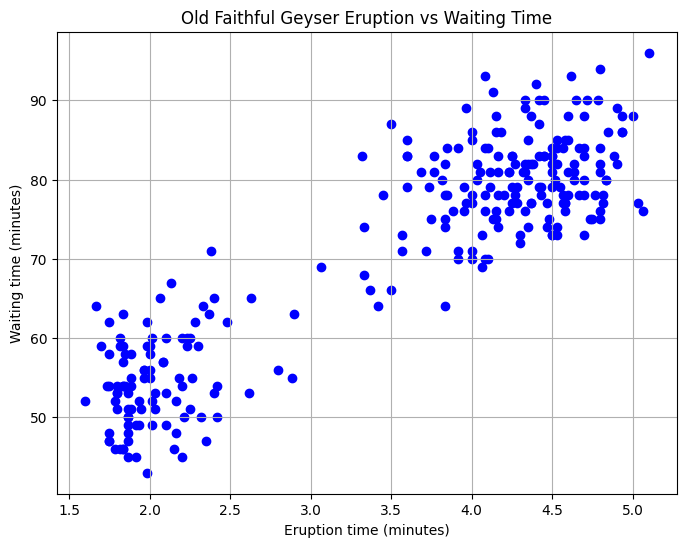

In [3]:
# Problem 1(a) Scatter Plot of Eruption Time vs Waiting Time
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

df.head()

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['eruptions'], df['waiting'], c='blue')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('Old Faithful Geyser Eruption vs Waiting Time')
plt.grid(True)
plt.show()


In [5]:
# Problem 2: K-Means Clustering Implementation
# (a) Implement K-Means Algorithm from Scratch
import numpy as np

# Get only the features
X = df[['eruptions', 'waiting']].values

# K-Means from scratch
def k_means(X, k, max_iters=100):
    # Randomly choose k data points as initial centers
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    centers = X[indices]

    for it in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centers
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Objective function (sum of squared distances)
        objective = np.sum((X - centers[labels])**2)

        # If centers don't change much, break
        if np.allclose(centers, new_centers, atol=1e-4):
            break

        centers = new_centers

    return centers, labels

# Running K-Means
k = 2  # based on Problem 1
centers, labels = k_means(X, k)


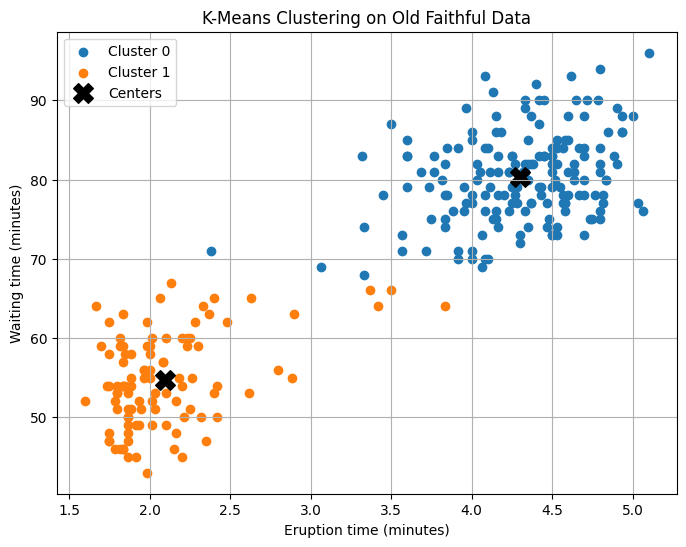

In [7]:
# (b) Scatter plot with Clusters Color-Coded
# Scatter plot with clusters
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')
plt.scatter(centers[:,0], centers[:,1], c='black', marker='X', s=200, label='Centers')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('K-Means Clustering on Old Faithful Data')
plt.legend()
plt.grid(True)
plt.show()


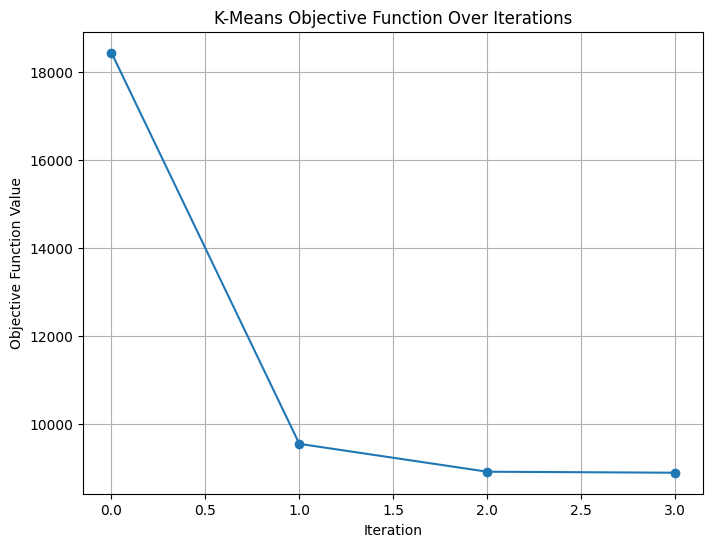

In [8]:
# (C) Objective Function vs Iterations Plot
def k_means_with_objective(X, k, max_iters=100):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    centers = X[indices]
    objectives = []

    for it in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        objective = np.sum((X - centers[labels])**2)
        objectives.append(objective)

        if np.allclose(centers, new_centers, atol=1e-4):
            break

        centers = new_centers

    return centers, labels, objectives

# Running
centers, labels, objectives = k_means_with_objective(X, k)

# Plot
plt.figure(figsize=(8,6))
plt.plot(objectives, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('K-Means Objective Function Over Iterations')
plt.grid(True)
plt.show()
